In [2]:
#to merge all the data given
import os
import pandas as pd
# Define the directory containing the data files
data_dir = 'Downloads/1234567/'

# Initialize an empty list to store dataframes
dfs = []

# Loop through each data file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.txt'):  # Assuming data files are in text format
        # Read the data file into a dataframe
        df = pd.read_csv(os.path.join(data_dir, file), sep='\t')
        
        # Append the dataframe to the list
        dfs.append(df)

# Merge or concatenate the dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

In [35]:
#to find the differences between cell viability in mutant and 
merged_df['CV.Repmean'] = merged_df[['CellViability.Mut.Rep1', 'CellViability.Mut.Rep2', 'CellViability.Mut.Rep3']].mean(axis=1)
merged_df['CV.WTRepmean'] = merged_df[['CellViability.WT.Rep1', 'CellViability.WT.Rep2', 'CellViability.WT.Rep3']].mean(axis=1)
merged_df['cvmean']=merged_df['CV.Repmean'] - merged_df['CV.WTRepmean']

In [36]:
#to find the differences between mrna expression in mutant and wt
merged_df['mrna.mean'] = merged_df[['mRNA.Expression.Mut.Rep1', 'mRNA.Expression.Mut.Rep2', 'mRNA.Expression.Mut.Rep3']].mean(axis=1)
merged_df['mrna.WTmean'] = merged_df[['mRNA.Expression.WT.Rep1', 'mRNA.Expression.WT.Rep2', 'mRNA.Expression.WT.Rep3']].mean(axis=1)
merged_df['mrnamean']=merged_df['mrna.mean'] - merged_df['mrna.WTmean']

In [37]:
#to find the differences between protein expression in mutant and wt
merged_df['pro.mean'] = merged_df[['Protein.Expression.Mut.Rep1', 'Protein.Expression.Mut.Rep3', 'Protein.Expression.Mut.Rep3']].mean(axis=1)
merged_df['pro.WTmean'] = merged_df[['Protein.Expression.WT.Rep1', 'Protein.Expression.WT.Rep3', 'Protein.Expression.WT.Rep3']].mean(axis=1)
merged_df['promean']=merged_df['pro.mean'] - merged_df['pro.WTmean']

In [38]:
print (merged_df)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [39]:
#to find the location of mutation and top 5 genes
def location(row):
    wildtype_seq = row["WildType.Sequence"]
    mutation_seq = row["Mutant.Sequence"]
    
    mutation_loc = [i for i in range(min(len(wildtype_seq), len(mutation_seq))) if wildtype_seq[i] != mutation_seq[i]]
    
    if any(position < 1000 for position in mutation_loc):
        return "promoter"
    elif any(position >= 1000 for position in mutation_loc):
        return "CDS"
    else:
        return "no mutation"

merged_df["mutation_position"] = merged_df.apply(loc, axis=1)


In [40]:
def CVeffect(row):
    if row['mrna.mean'] > 0:
        return 'Increase'
    elif row['mrna.mean'] < 0:
        return 'Decrease'
    else:
        return 'No Effect'
    
merged_df['CVeffect'] = merged_df.apply(CVeffect, axis=1)
sort_genes = merged_df.sort_values(by='CVeffect', ascending=False)
top_genes = sort_genes.head(5)
print(top_genes[['Gene', 'Mutation_Type', 'CVeffect', 'mutation_position', 'mrna.mean']])

       Gene Mutation_Type  CVeffect mutation_position     mrna.mean
0       Ah3  Substitution  Increase          promoter  1.061045e+08
25     Ist3      Deletion  Increase          promoter  8.773715e+00
27   Ist9a7  Substitution  Increase          promoter  1.034101e+02
28    Ist9a      Deletion  Increase          promoter  6.676541e+01
29  Jams9r2      Deletion  Increase          promoter  7.316609e+02


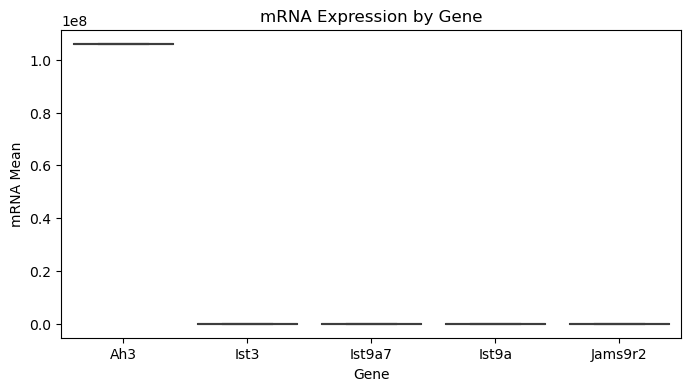

In [51]:
#to make the visuals( boxplot,scatterplot, kdepplot)
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Gene', y='mrna.mean', data=top_genes)
plt.title('mRNA Expression by Gene')
plt.xlabel('Gene')
plt.ylabel('mRNA Mean')
plt.show()

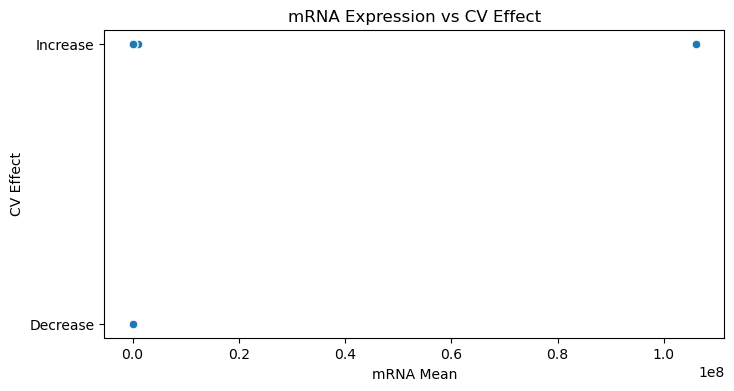

In [43]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mrna.mean', y='CVeffect', data=merged_df)
plt.title('mRNA Expression vs CV Effect')
plt.xlabel('mRNA Mean')
plt.ylabel('CV Effect')
plt.show()


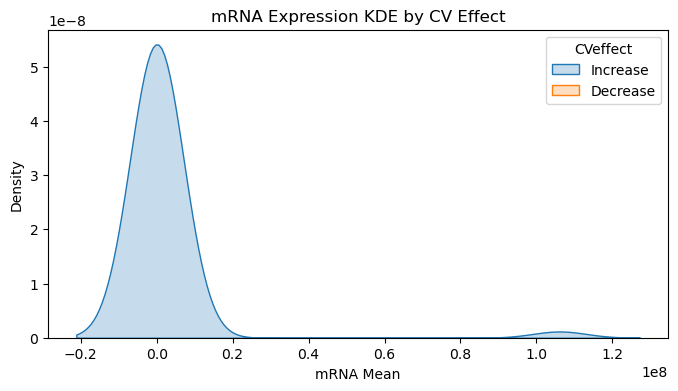

In [48]:
# KDE Plot
plt.figure(figsize=(8, 4))
sns.kdeplot(data=merged_df, x='mrna.mean', hue='CVeffect', fill=True, warn_singular=False)
plt.title('mRNA Expression KDE by CV Effect')
plt.xlabel('mRNA Mean')
plt.ylabel('Density')
plt.show()